In [ ]:
import pandas as pd
from datetime import datetime
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
df = pd.read_csv(url)
id_vars = ['Province/State','Country/Region', 'Lat', 'Long']
val_vars = [x for x in df.columns if x not in id_vars]; val_vars
df = df.melt(id_vars=id_vars, value_vars=val_vars, var_name='date', value_name='confirmed')

In [ ]:
def parse_to_date(string):
    return datetime.strptime(string, '%m/%d/%y')

In [ ]:
df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
df = df.groupby(by=['Country/Region', 'date'], as_index=False).sum()
df.date = df.date.apply(parse_to_date)
pivoted_df = df.pivot(columns='Country/Region', index='date', values='confirmed')

In [ ]:
df['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cruise Ship', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Guadeloupe', 'Guatemala', 'Guernsey', 'Guinea',
       'Guyana', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       '

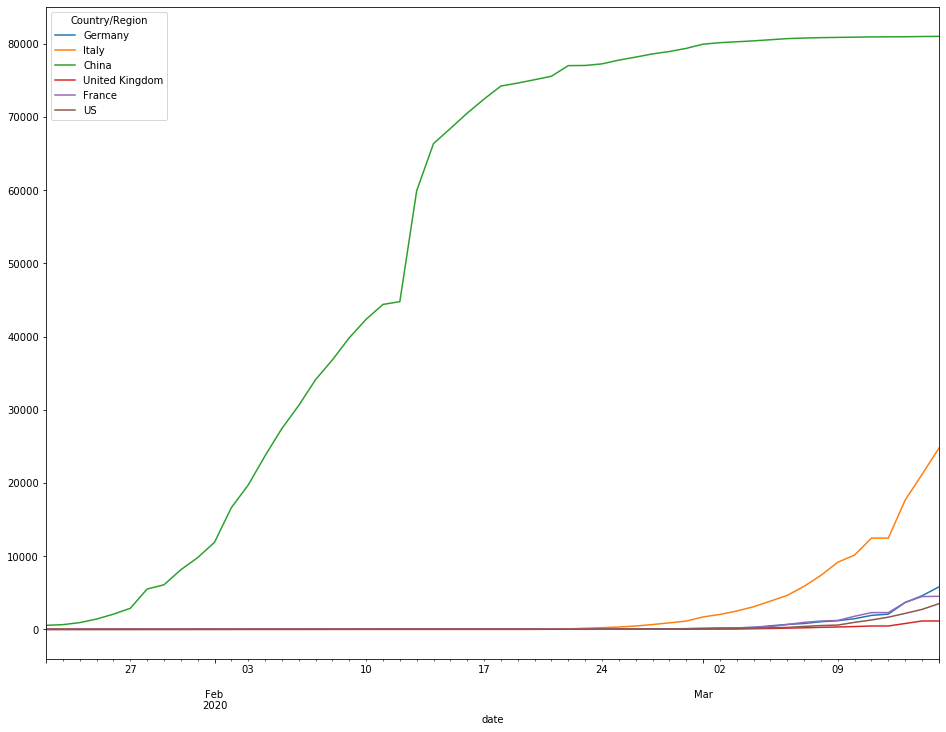

In [ ]:
pivoted_df.plot(y=['Germany', 'Italy', 'China', 'United Kingdom', 'France', 'US'], figsize=(16,12))

In [ ]:
train_df = df.copy()
train_df['weekday'] = train_df.date.dt.weekday

In [ ]:
countries = train_df['Country/Region'].unique()
first_days = {}
for ctry in countries:
    dates = train_df[(train_df['Country/Region']==ctry) & (train_df.confirmed>100)].date.values
    first_day = min(dates) if len(dates) else datetime.today()
    first_days[ctry] = first_day

train_df['elapsed_days'] = (train_df.date - train_df['Country/Region'].map(first_days)).dt.days

In [ ]:
train_df =train_df[train_df.elapsed_days>=0]

In [ ]:
pivot_tdf = train_df.pivot(columns='Country/Region', index='elapsed_days', values='confirmed')

In [ ]:
train_df.to_csv('/Users/saschahofmann/Downloads/elapsed-covid-19.csv')

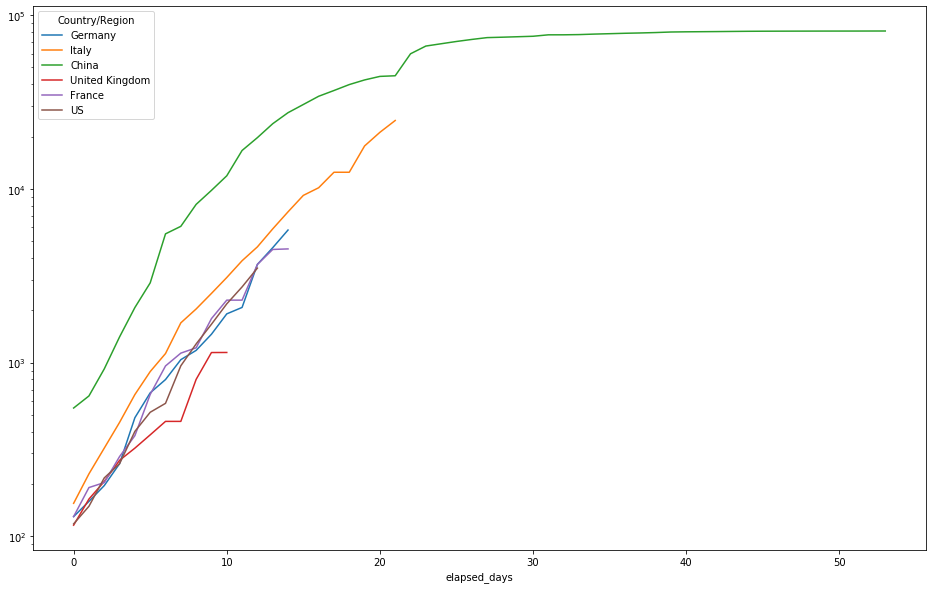

In [ ]:
pivot_tdf.plot(y=['Germany', 'Italy', 'China', 'United Kingdom', 'France', 'US'], figsize=(16,10), logy=True)

In [ ]:
df.to_csv('/Users/saschahofmann/Downloads/confirmed-covid-19.csv')